# SpaCy introduction for NLP | Linguistic Features Extraction in NLP

In Example 1  Apple is the company name whereas in Example 2 apple is the fruit name.

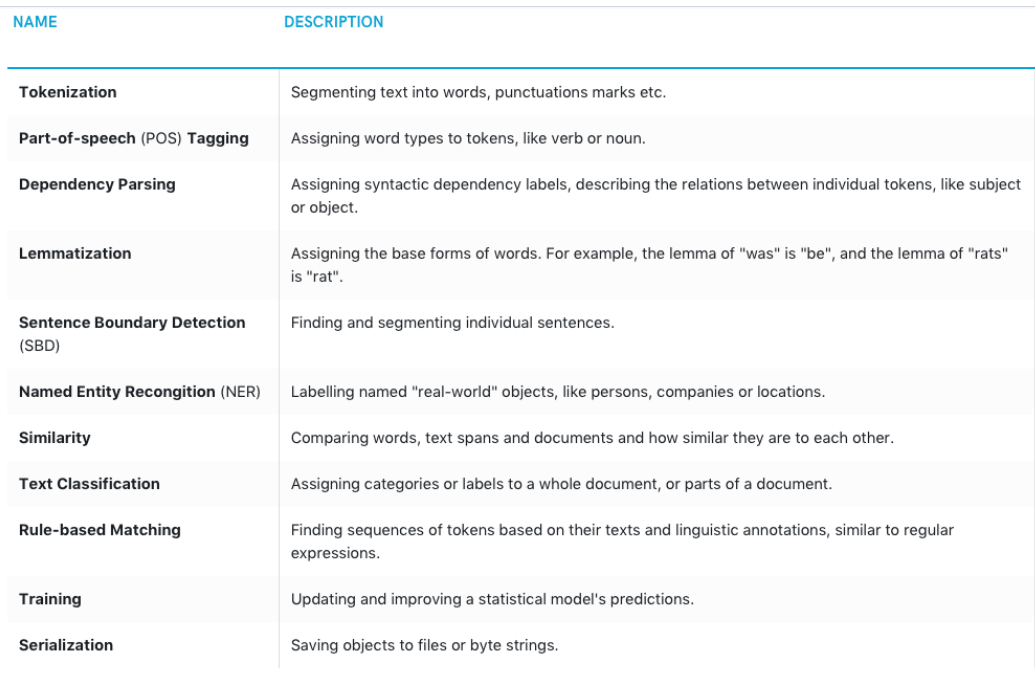

https://spacy.io/models/en

In [1]:
#!pip install -U spacy

In [2]:
#!pip install -U spacy-lookups-data

In [3]:
#!python -m spacy download en_core_web_sm

Processing raw data is really difficult and most words are very rare, and it's common for words that look completely different to mean almost the same thing and also it is also very common that some words look similar but mean completely different thing.

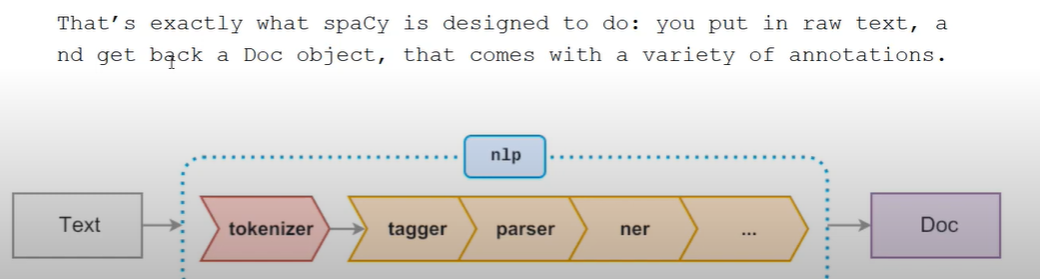

## Tokenization

Tokenization is a task of splitting a text into meaningful segments,called tokens. The input to the tokenizer is a unicode text, and the output is Doc object.

In [4]:
import spacy

In [5]:
nlp = spacy.load('en_core_web_sm')
#en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments),
#that includes vocabulary, syntax and entities.

In [6]:
doc=nlp("Apple is looking at buying U.K. startup for $1 billion")

In [7]:
for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [8]:
#lets see how below line is tokenized
doc=nlp("Apple isn't looking at buying U.K. startup for $1 billion")

In [9]:
for token in doc:
    print(token.text)

Apple
is
n't
looking
at
buying
U.K.
startup
for
$
1
billion


In [10]:
doc3=nlp("Apple isnt' looking at buying U.K. startup for $1 billion")

In [11]:
for token in doc3:
    print(token.text)

Apple
is
nt
'
looking
at
buying
U.K.
startup
for
$
1
billion


In [12]:
doc2=nlp("Apple 'isnt looking at buying U.K. startup for $1 billion")

In [13]:
for token in doc2:
    print(token.text)

Apple
'
is
nt
looking
at
buying
U.K.
startup
for
$
1
billion


In [14]:
doc1=nlp("Apple isnt looking at buying U.K. startup for $1 billion")

In [15]:
for token in doc1:
    print(token.text)

Apple
is
nt
looking
at
buying
U.K.
startup
for
$
1
billion


## Part-of-Speech [POS] Tagging

In [16]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [17]:
for token in doc:
    print(token.text, token.lemma)

Apple 6418411030699964375
is 10382539506755952630
n't 2043519015752540944
looking 16096726548953279178
at 11667289587015813222
buying 9457496526477982497
U.K. 14409890634315022856
startup 7622488711881293715
for 16037325823156266367
$ 11283501755624150392
1 5533571732986600803
billion 1231493654637052630


In [18]:
#Lemmatization#This will limit the word usage, this will compress our word dictionary
#this is imp because there are billions of words, so that's why we compress the dictionary
#using lemmatization
for token in doc:
    print(token.text , token.lemma_)

Apple Apple
is be
n't n't
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


In [19]:
for token in doc:     
    print(f'{token.text:{15}} {token.lemma_:{15}}')#15 character space

Apple           Apple          
is              be             
n't             n't            
looking         look           
at              at             
buying          buy            
U.K.            U.K.           
startup         startup        
for             for            
$               $              
1               1              
billion         billion        


In [20]:
for token in doc:
    print(f'{token.text:{15}} {token.lemma_}')

Apple           Apple
is              be
n't             n't
looking         look
at              at
buying          buy
U.K.            U.K.
startup         startup
for             for
$               $
1               1
billion         billion


In [21]:
for token in doc:
    print(f'{token.text:{25}} {token.lemma_}')

Apple                     Apple
is                        be
n't                       n't
looking                   look
at                        at
buying                    buy
U.K.                      U.K.
startup                   startup
for                       for
$                         $
1                         1
billion                   billion


In [22]:
for token in doc:
    print(f'{token.text:{25}} {token.lemma_:{15}} {token.pos_:{10}}')

Apple                     Apple           PROPN     
is                        be              AUX       
n't                       n't             PART      
looking                   look            VERB      
at                        at              ADP       
buying                    buy             VERB      
U.K.                      U.K.            PROPN     
startup                   startup         NOUN      
for                       for             ADP       
$                         $               SYM       
1                         1               NUM       
billion                   billion         NUM       


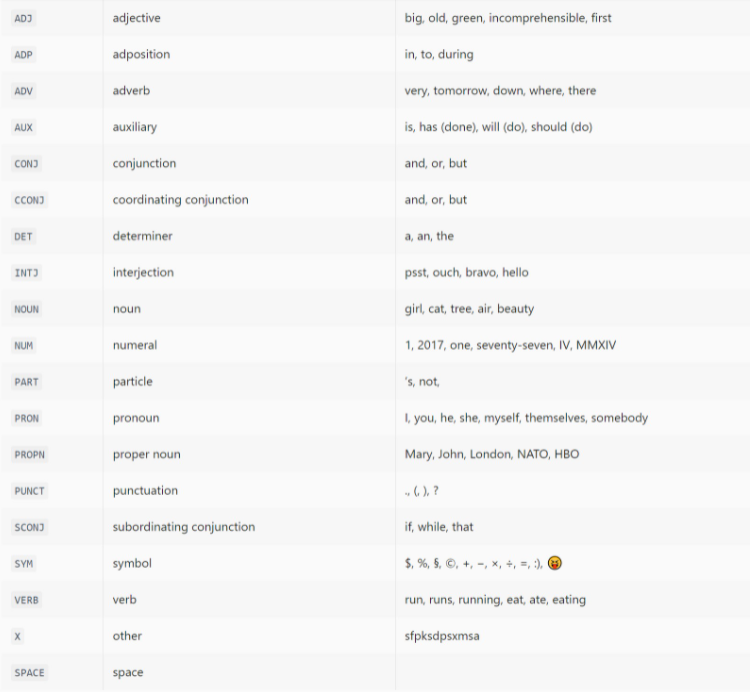

stop word info  
https://www.opinosis-analytics.com/knowledge-base/stop-words-explained/#.YWl5zhpBw2w

In [23]:
# let's see how many stopwords are there
for token in doc:
    print(f'{token.text:{25}} {token.lemma_:{15}} {token.pos_:{10}} {token.is_stop}')

Apple                     Apple           PROPN      False
is                        be              AUX        True
n't                       n't             PART       True
looking                   look            VERB       False
at                        at              ADP        True
buying                    buy             VERB       False
U.K.                      U.K.            PROPN      False
startup                   startup         NOUN       False
for                       for             ADP        True
$                         $               SYM        False
1                         1               NUM        False
billion                   billion         NUM        False


## Dependency Parsing

In [24]:
# how one word(token) is dependent on another word(token)
for chunk in doc.noun_chunks:
    print(f'{chunk.text:{15}}  {chunk.root.text:{15}}   {chunk.root.dep_}    ')



Apple            Apple             nsubj    
U.K. startup     startup           dobj    


In [25]:
[(token.text,token.dep_) for token in doc]

[('Apple', 'nsubj'),
 ('is', 'aux'),
 ("n't", 'neg'),
 ('looking', 'ROOT'),
 ('at', 'prep'),
 ('buying', 'pcomp'),
 ('U.K.', 'compound'),
 ('startup', 'dobj'),
 ('for', 'prep'),
 ('$', 'quantmod'),
 ('1', 'compound'),
 ('billion', 'pobj')]

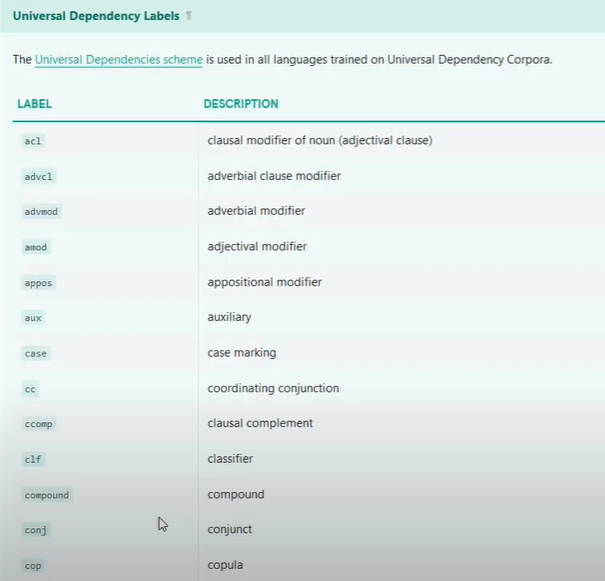

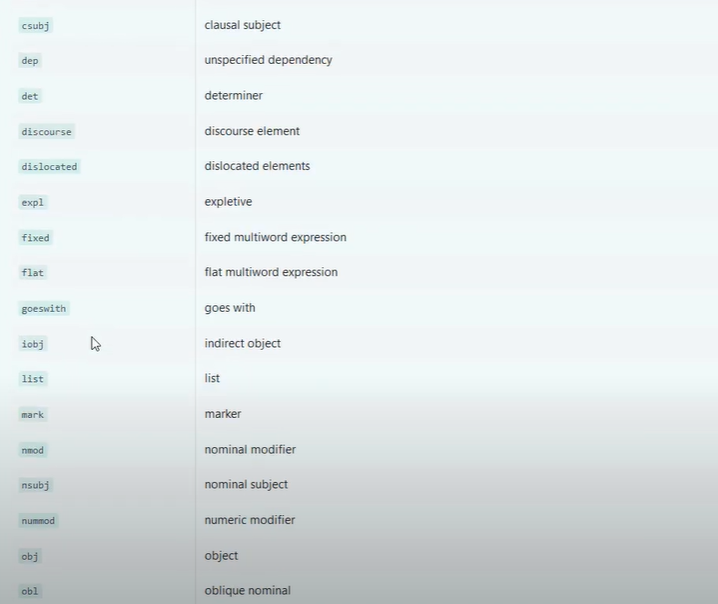

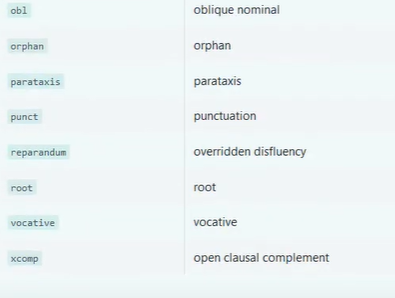

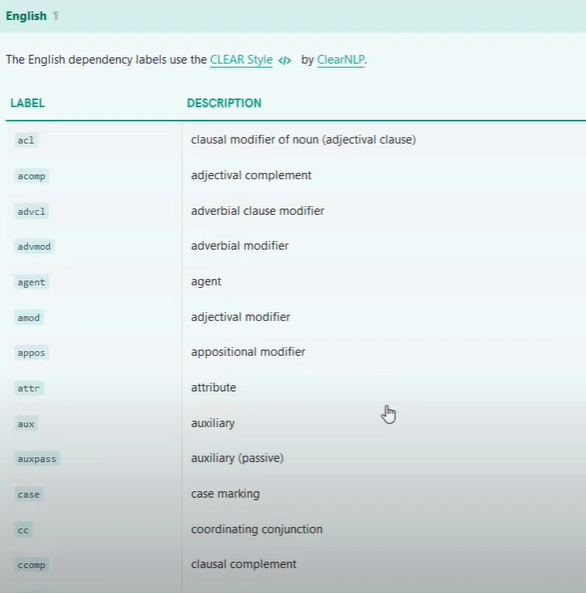

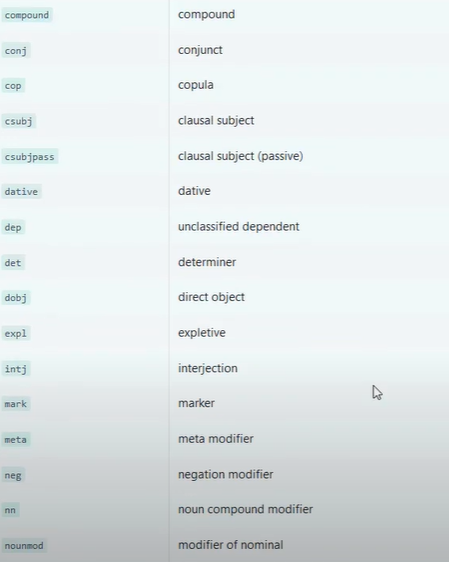

Spacy is not 100% accurate, it's accuracy is in between 80 to 90 % which is fine and sometimes it doesn't classify accurately that's why we use rule based classification.
We will see it later that how to write our own rule and how to add that in pipeline of spacy to classify the text

### Named Entity Recognition

In [26]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [27]:
for ent in doc.ents:
    print(ent.text, ent.label_)


Apple ORG
U.K. GPE
$1 billion MONEY


### Sentence Segmentation

In [28]:
#doc.sents

In [29]:
doc

Apple isn't looking at buying U.K. startup for $1 billion

In [30]:
for sent in doc.sents:
    print(sent)

Apple isn't looking at buying U.K. startup for $1 billion


In [31]:
doc1=nlp("I am Mayur Shimpi.This is jupyter notebook of SpaCy learning. This is the first time I am learning NLP ")

In [32]:
doc1

I am Mayur Shimpi.This is jupyter notebook of SpaCy learning. This is the first time I am learning NLP 

In [33]:
for sent in doc1.sents:
    print(sent)

I am Mayur Shimpi.
This is jupyter notebook of SpaCy learning.
This is the first time I am learning NLP


In [34]:
 doc1=nlp("I am Mayur Shimpi? This is jupyter notebook of SpaCy learning ")

In [35]:
doc1

I am Mayur Shimpi? This is jupyter notebook of SpaCy learning 

In [36]:
for sent in doc1.sents:
    print(sent)

I am Mayur Shimpi?
This is jupyter notebook of SpaCy learning


In [37]:
doc1=nlp("I am Mayur Shimpi! This is jupyter notebook of SpaCy learning ")

In [38]:
for sent in doc1.sents:
    print(sent)

I am Mayur Shimpi!
This is jupyter notebook of SpaCy learning


In [39]:
doc1=nlp("I am Mayur_ Shimpi This is jupyter notebook of SpaCy learning")

In [40]:
for sent in doc1.sents:
    print(sent)

I am Mayur_
Shimpi This is jupyter notebook of SpaCy learning


In [41]:
doc1=nlp("I am...Mayur Shimpi...This is jupyter notebook of SpaCy learning")

In [42]:
for sent in doc1.sents:
    print(sent)

I am...
Mayur Shimpi...
This is jupyter notebook of SpaCy learning


In [43]:
for token in doc1:
    print(token)

I
am
...
Mayur
Shimpi
...
This
is
jupyter
notebook
of
SpaCy
learning


In [44]:
text='Welcome to KGP Talkie...Thanks...Like and Subscribe!'
doc=nlp(text)

In [45]:
for sent in doc.sents:
    print(sent)

Welcome to KGP Talkie...
Thanks...Like and Subscribe!


In [46]:
for token in doc:
    print(token)

Welcome
to
KGP
Talkie
...
Thanks
...
Like
and
Subscribe
!


In [47]:
from spacy.language import Language

In [48]:
#now we will write our own(custom) rule
@Language.component('Inn')
def set_rule(doc):
        for token in doc[:-1]:
             if token.text == '...':
                doc[token.i+1].is_sent_start=True
        return doc       

In [49]:
#adding above in pipeline

In [50]:

nlp.add_pipe('Inn', before='parser')


<function __main__.set_rule(doc)>

In [51]:
text='I am...Mayur Shimpi...This is jupyter notebook of SpaCy learning'
doc=nlp(text)

In [52]:
for sent in doc.sents:
    print(sent)

I am...
Mayur Shimpi...
This is jupyter notebook of SpaCy learning


In [53]:
for token in doc:
    print(token)

I
am
...
Mayur
Shimpi
...
This
is
jupyter
notebook
of
SpaCy
learning


In [54]:
text='Welcome to KGP Talkie...Thanks...Like and Subscribe!'
doc=nlp(text)

In [55]:
for sent in doc.sents:
    print(sent)

Welcome to KGP Talkie...
Thanks...
Like and Subscribe!


In [56]:
for token in doc:
    print(token)

Welcome
to
KGP
Talkie
...
Thanks
...
Like
and
Subscribe
!


In [57]:
# doc1=nlp("I am.*.Mayur Shimpi.*.This is jupyter notebook of SpaCy learning")

In [58]:
# for sent in doc1.sents:
#     print(sent)

In [59]:
# for tokens in doc1:
#     print(tokens)

### Visualization

In [60]:
from spacy import displacy

In [61]:
doc

Welcome to KGP Talkie...Thanks...Like and Subscribe!

In [62]:
displacy.render(doc, style='dep')

In [63]:
displacy.render(doc, style='dep',options={'compact':True})


In [64]:
displacy.render(doc, style='dep',options={'compact':True,'distance': 60})#60 character distance


In [65]:
doc=nlp("Apple is looking at buying U.K. startup for $1 billion")

In [66]:
displacy.render(doc, style='ent')